# YOLOv11 TEST

In [1]:
!nvidia-smi

Sun Oct 20 18:29:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip list | grep torch

torch                              2.4.1+cu121
torchaudio                         2.4.1+cu121
torchsummary                       1.5.1
torchvision                        0.19.1+cu121


In [3]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.1/112.6 GB disk)


WEIGHT AND BIASES

In [4]:
!pip install wandb -qU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 32.8 MB/s eta 0:00:00


In [5]:
# Log in to your W&B account
import wandb
import random
import math

In [6]:
wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: ERROR API key must be 40 characters long, yours was 124


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

DATASET

In [29]:
!mkdir -p /datasets
%cd /datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("capstone-project-wkwft").project("trial-assignment")
version = project.version(2)
dataset = version.download("yolov11")

/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TRIAL-ASSIGNMENT-2 in yolov11:: 100%|██████████| 172/172 [00:00<00:00, 6419.24it/s]


TRAINING

In [30]:
%cd /datasets

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 batch=128 imgsz=640 plots=True

/datasets
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/datasets/TRIAL-ASSIGNMENT-2/data.yaml, epochs=10, time=None, patience=100, batch=128, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

GRAPHS

In [31]:
!ls /datasets/runs/detect/train3

args.yaml					     labels.jpg    train_batch0.jpg
confusion_matrix_normalized.png			     P_curve.png   train_batch1.jpg
confusion_matrix.png				     PR_curve.png  train_batch2.jpg
events.out.tfevents.1729451226.43d58715c08b.11347.0  R_curve.png   val_batch0_labels.jpg
F1_curve.png					     results.csv   val_batch0_pred.jpg
labels_correlogram.jpg				     results.png   weights


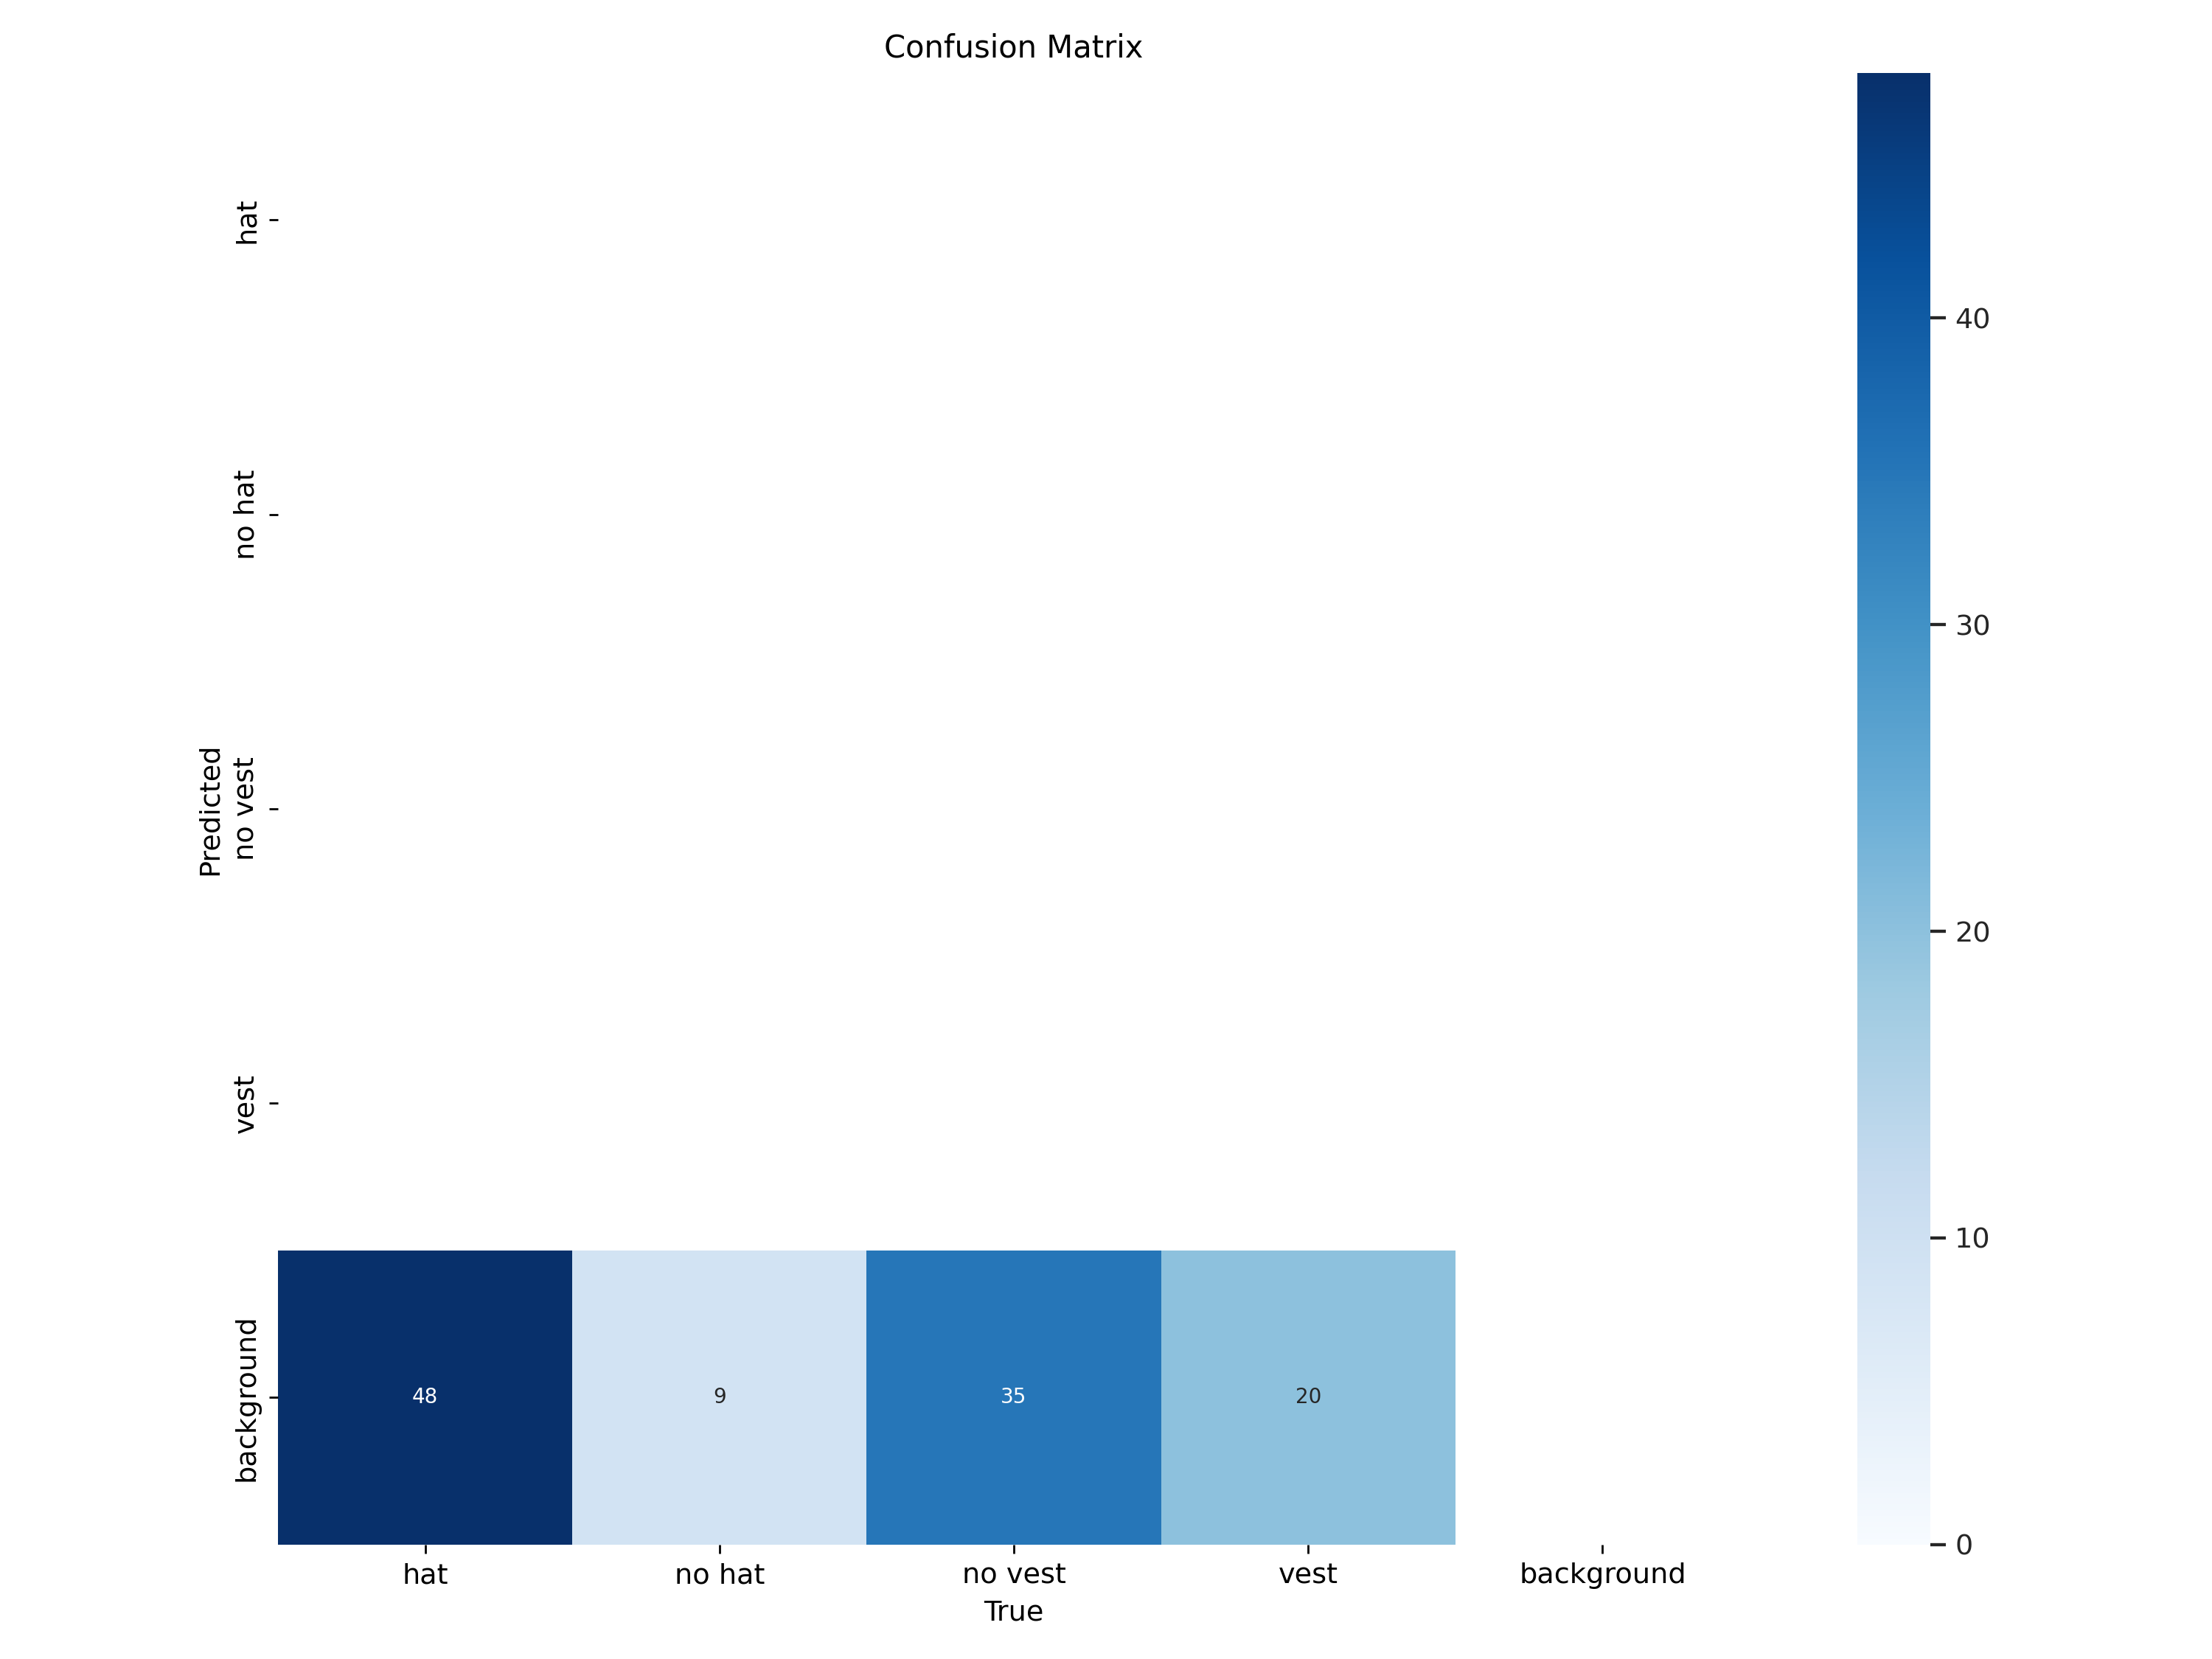

In [32]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/datasets/runs/detect/train3/confusion_matrix.png', width=600)

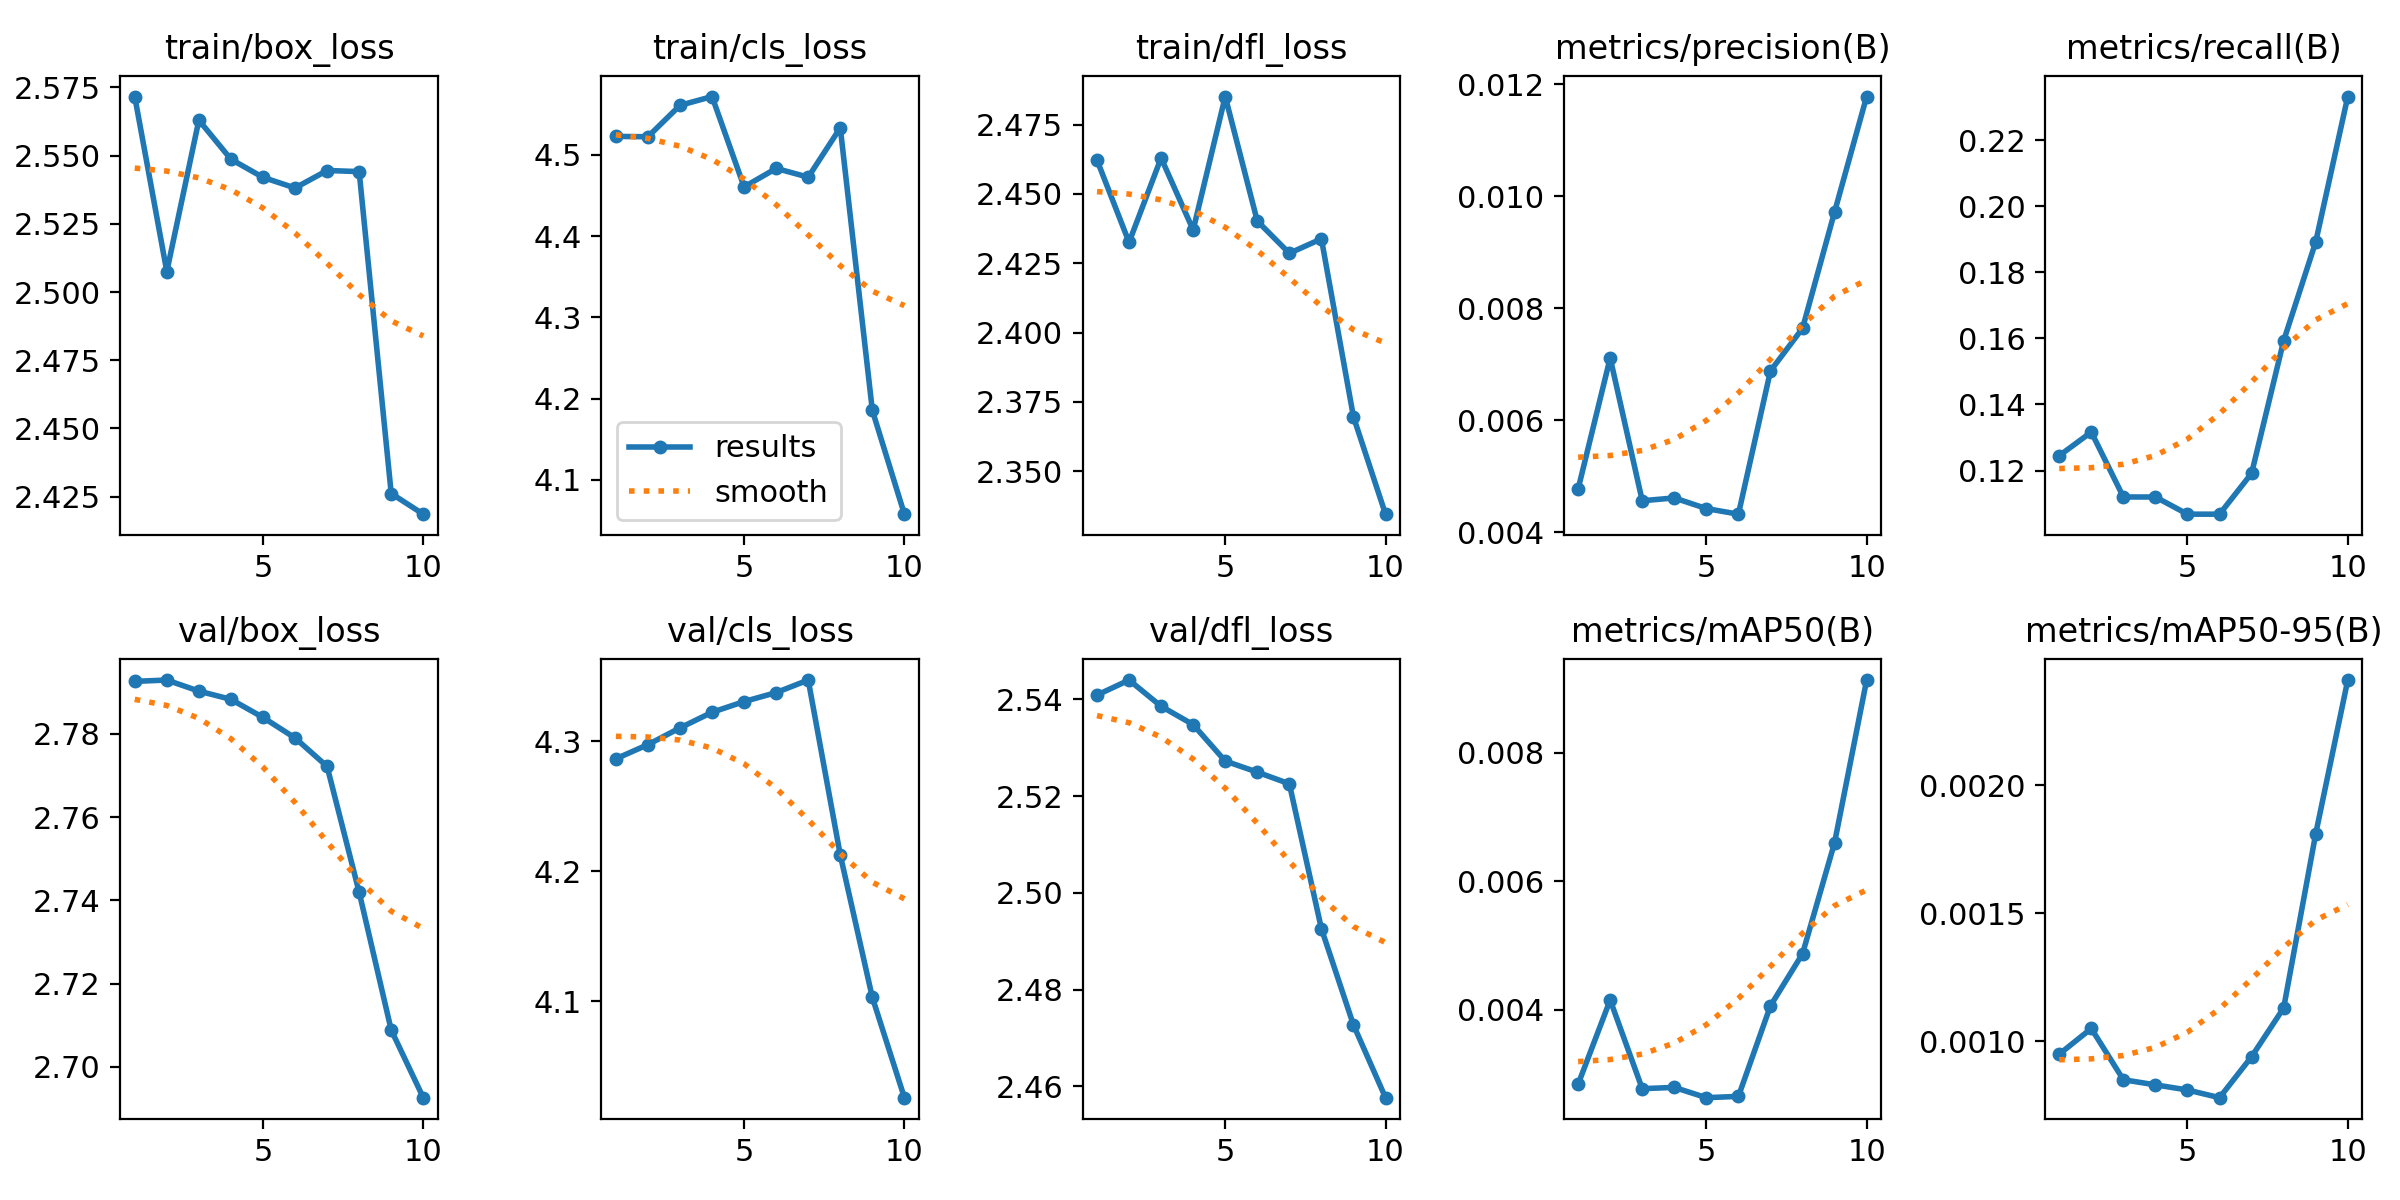

In [33]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/datasets/runs/detect/train3/results.png', width=600)

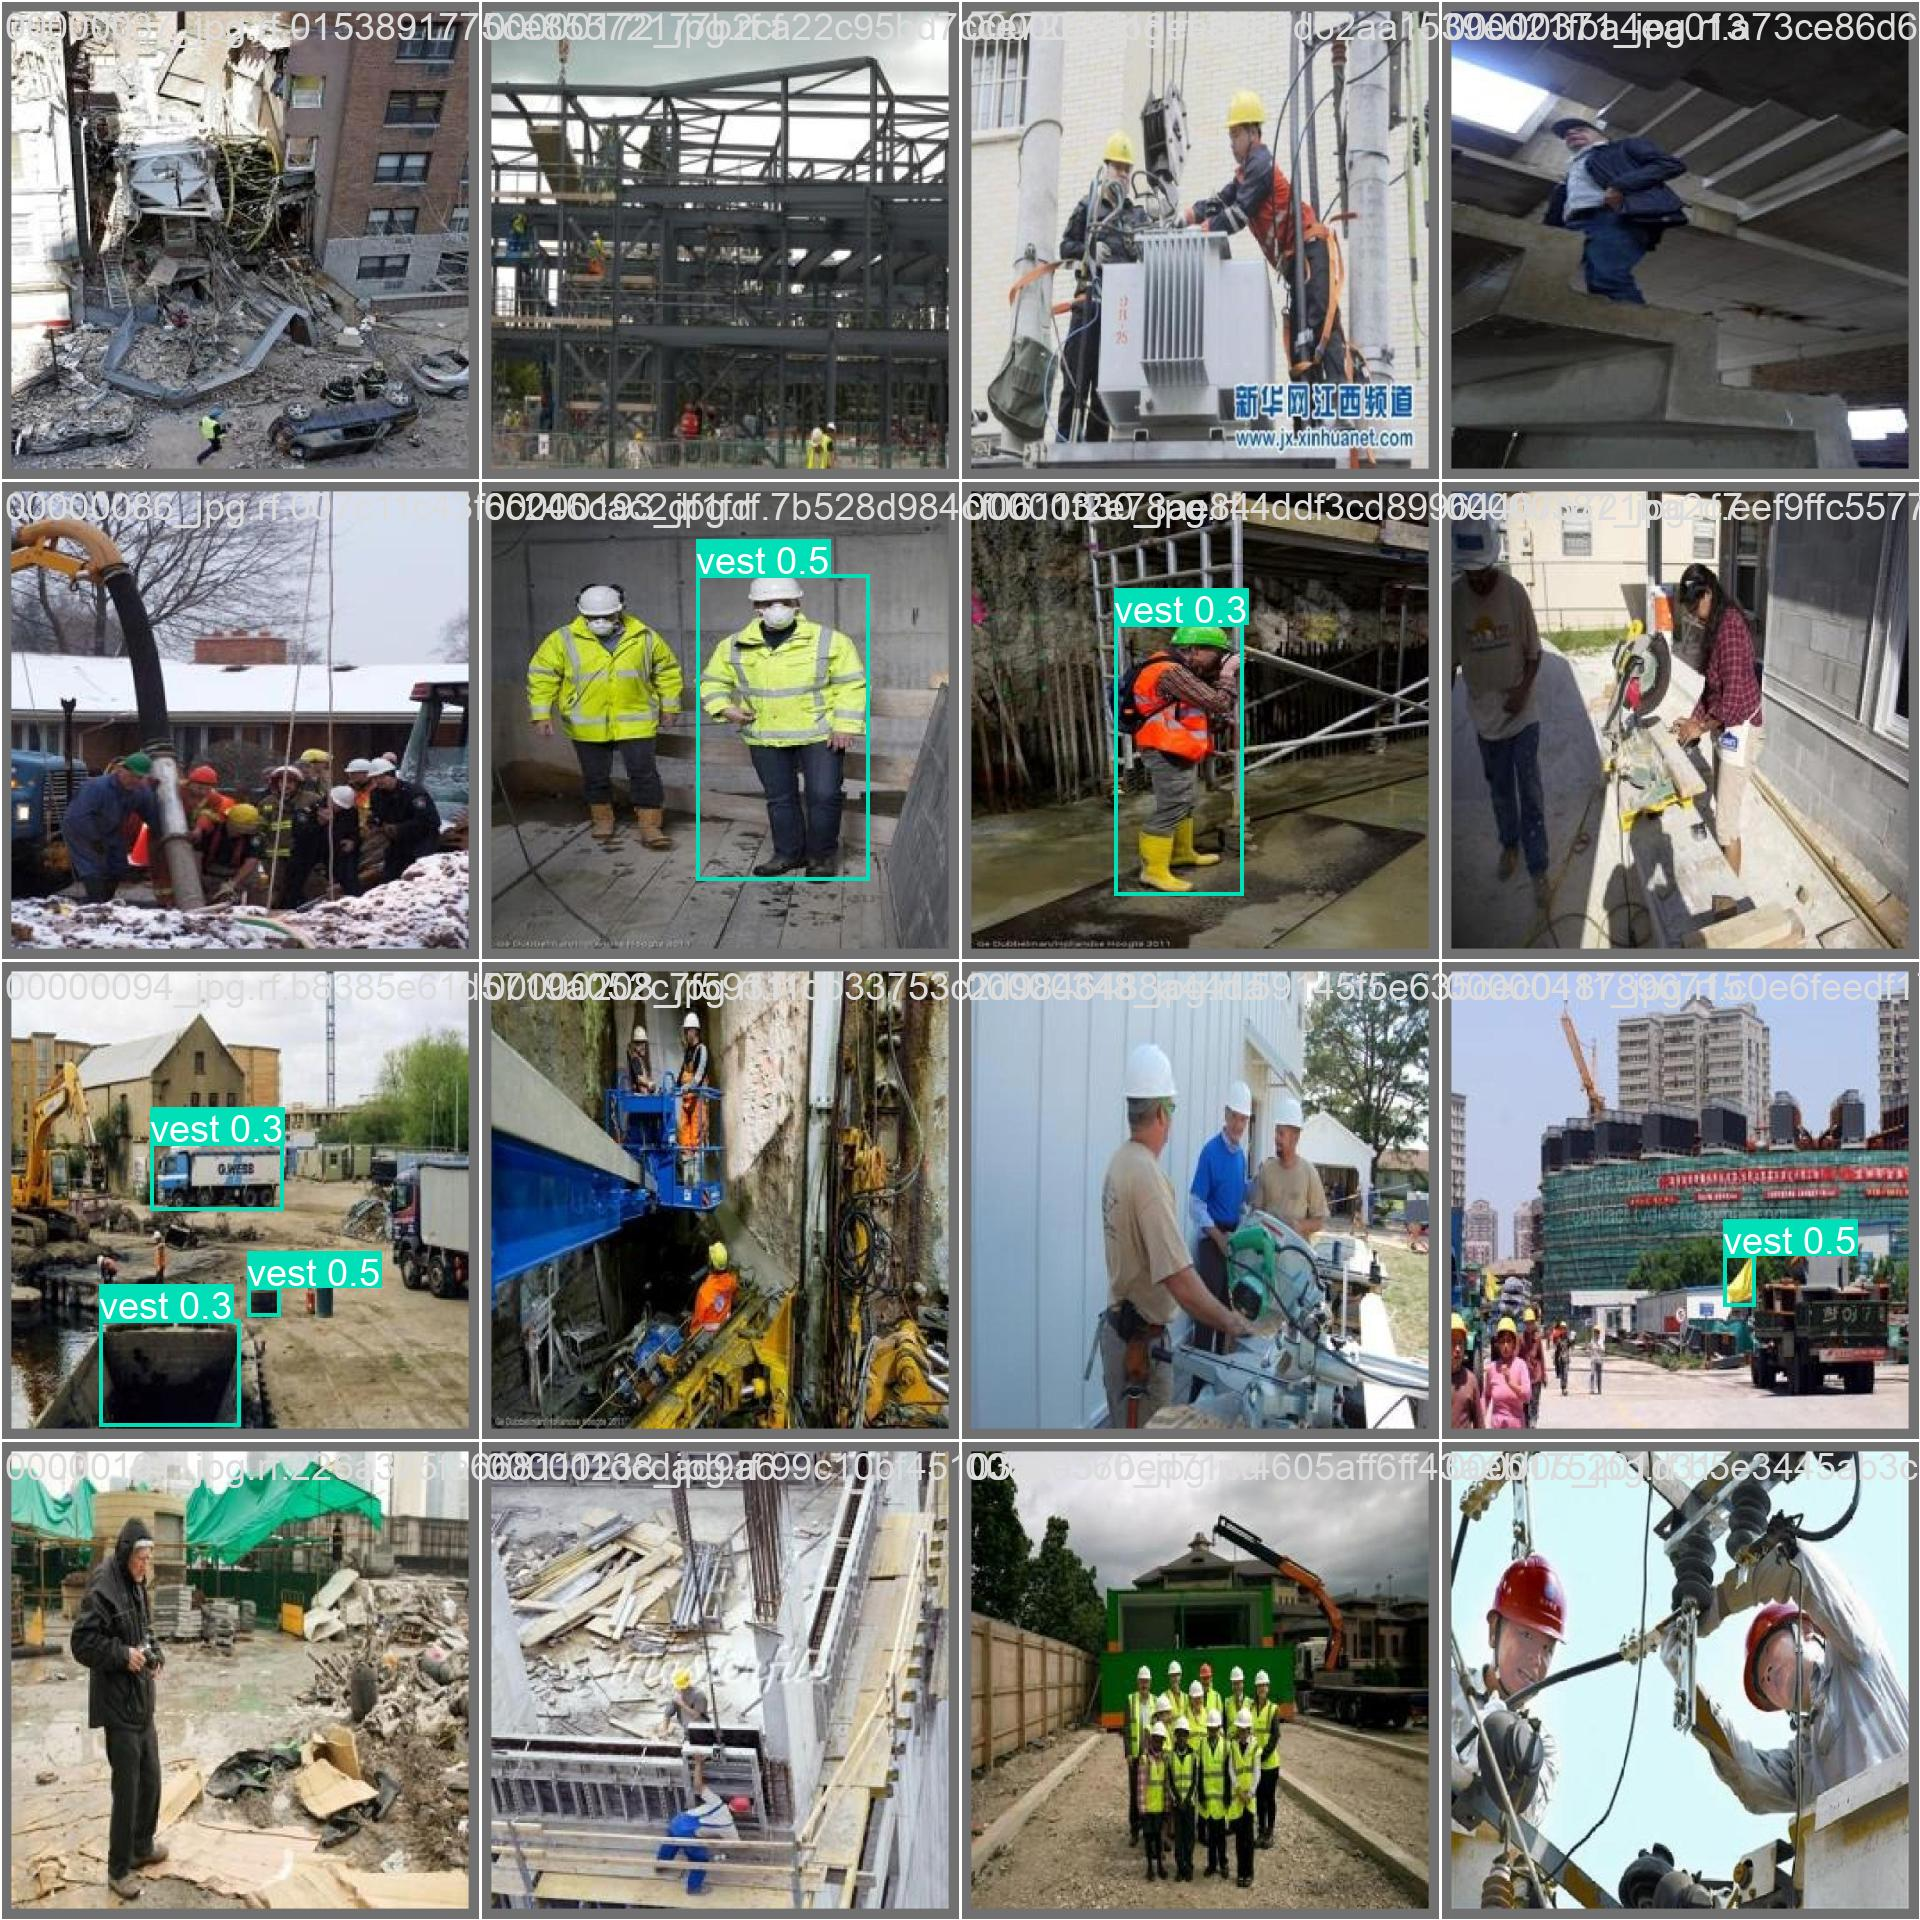

In [34]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/datasets/runs/detect/train3/val_batch0_pred.jpg', width=600)

In [35]:
!yolo task=detect mode=val model=/datasets/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /datasets/TRIAL-ASSIGNMENT-2/valid/labels.cache... 20 images, 1 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.21it/s]
                   all         20        112      0.012      0.238    0.00937    0.00245
                   hat         16         48     0.0117      0.292      0.012    0.00247
                no hat          5          9    0.00168      0.333    0.00263   0.000634
               no vest         14         35      0.034      0.229     0.0224    0.00659
                  vest          6         20   0.000719        0.1     0.0004   9.97e-05
Speed: 0.5ms preprocess, 22.6ms inference, 0.0ms loss, 42.5ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at h

In [36]:
!yolo task=detect mode=predict model=/datasets/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs

image 1/8 /datasets/TRIAL-ASSIGNMENT-2/test/images/00000039_jpg.rf.2b724ca7a67b76e912dbc975eaa676d7.jpg: 640x640 (no detections), 15.6ms
image 2/8 /datasets/TRIAL-ASSIGNMENT-2/test/images/00000040_jpg.rf.df20318f0736b27b637bf9edf15c96ef.jpg: 640x640 1 vest, 15.6ms
image 3/8 /datasets/TRIAL-ASSIGNMENT-2/test/images/00000059_jpg.rf.4c89201721e68c5f941a1dfbef6555bb.jpg: 640x640 13 vests, 15.6ms
image 4/8 /datasets/TRIAL-ASSIGNMENT-2/test/images/00000068_jpg.rf.0bec5f1ae68b52aa2a3f9bcc8085dcae.jpg: 640x640 1 vest, 15.5ms
image 5/8 /datasets/TRIAL-ASSIGNMENT-2/test/images/00000258_jpg.rf.a9bcaf923b0e8fb5f068a8a29a1794c8.jpg: 640x640 (no detections), 15.5ms
image 6/8 /datasets/TRIAL-ASSIGNMENT-2/test/images/000015_jpg.rf.d9d690b72a9d79394b538ff3d10ea3dd.jpg: 640x640 3 vests, 15.6ms
image 7/8 /datasets/TRIAL-ASSIGNMENT-2/test/im

In [37]:
project = rf.workspace("capstone-project-wkwft").project("trial-assignment")
version = project.version(2)
version.deploy(model_type="yolov11", model_path=f"/datasets/runs/detect/train2/")

loading Roboflow workspace...
loading Roboflow project...
View the status of your deployment at: https://app.roboflow.com/capstone-project-wkwft/trial-assignment/2
Share your model with the world at: https://universe.roboflow.com/capstone-project-wkwft/trial-assignment/model/2
